In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Au_nanoParticle_dataset.csv")

In [3]:
df.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [4]:
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]


In [5]:
print(new_df.head(20))


    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


In [6]:
stats = new_df.describe().T[['mean','std','25%','50%','75%']]
print("\nStatistics:\n", stats)


Statistics:
                   mean          std          25%         50%          75%
N_total    3476.786500  3679.286769  1061.000000  1867.00000  4503.000000
N_bulk     2521.550250  2976.232459   618.750000  1199.00000  3183.000000
N_surface   955.236250   721.870220   437.000000   666.00000  1301.750000
R_avg        20.654363     7.610716    15.160725    18.62925    25.525125


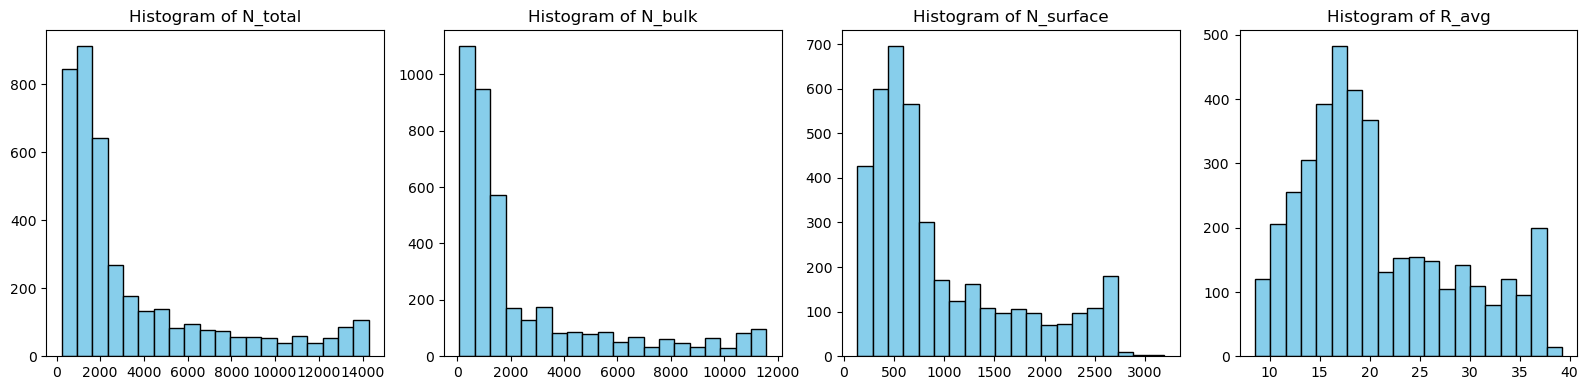

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for i, col in enumerate(new_df.columns):
    axes[i].hist(new_df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

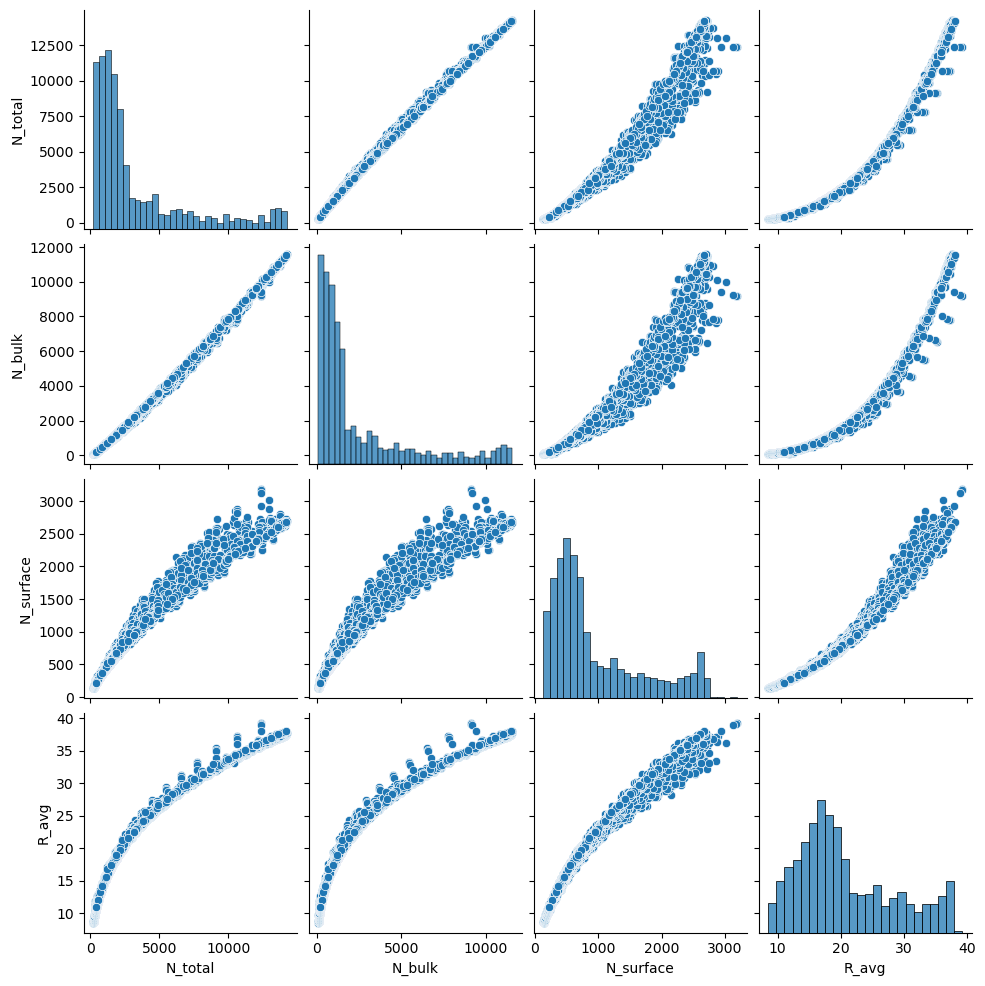

In [8]:
sns.pairplot(new_df)
plt.show()


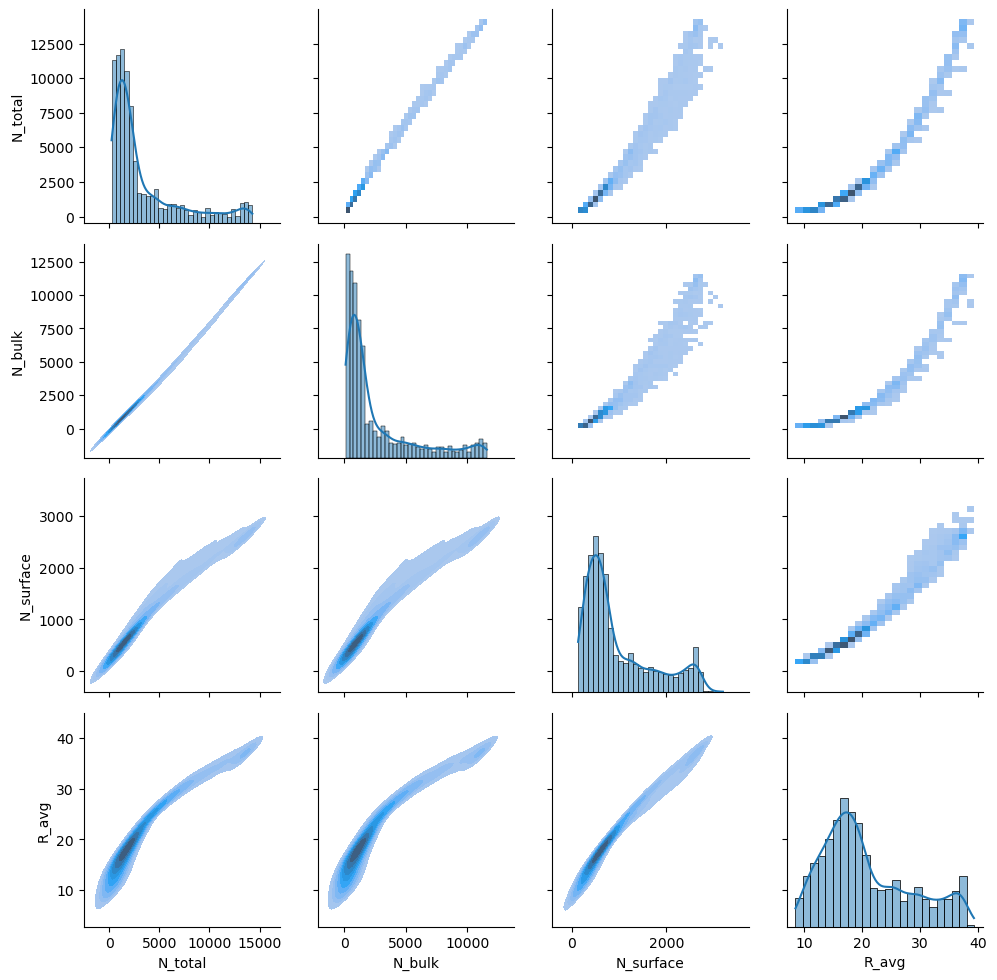

In [9]:
g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)  # bivariate histogram
g.map_diag(sns.histplot, kde=True)  # histogram + KDE
g.map_lower(sns.kdeplot, fill=True)  # bivariate KDE
plt.show()